# RSA Timing Attack

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEXMEGA'
CRYPTO_TARGET = 'AVRCRYPTOLIB'

# Firmware

In [64]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../../hardware/victims/Mycrypto/simpleserial-rsa-nchu
make PLATFORM=$1 CRYPTO_TARGET=$2

SS_VER set to SS_VER_1_1
C:/Users/VLSI/CHIPWH~1/cw/home/portable/avrgcc/bin/make clean_objs .dep 
make[1]: Entering directory 'C:/Users/VLSI/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/Mycrypto/simpleserial-rsa-nchu'
SS_VER set to SS_VER_1_1
rm -f -- simpleserial-rsa-CWLITEXMEGA.hex
rm -f -- simpleserial-rsa-CWLITEXMEGA.eep
rm -f -- simpleserial-rsa-CWLITEXMEGA.cof
rm -f -- simpleserial-rsa-CWLITEXMEGA.elf
rm -f -- simpleserial-rsa-CWLITEXMEGA.map
rm -f -- simpleserial-rsa-CWLITEXMEGA.sym
rm -f -- simpleserial-rsa-CWLITEXMEGA.lss
rm -f -- objdir-CWLITEXMEGA/*.o
rm -f -- objdir-CWLITEXMEGA/*.lst
rm -f -- simpleserial-rsa.s simpleserial-rsa-xmega.s simpleserial-rsa-arm.s simpleserial.s XMEGA_AES_driver.s uart.s usart_driver.s xmega_hal.s rsa_basic.s bigint.s
rm -f -- simpleserial-rsa.d simpleserial-rsa-xmega.d simpleserial-rsa-arm.d simpleserial.d XMEGA_AES_driver.d uart.d usart_driver.d xmega_hal.d rsa_basic.d bigint.d
rm -f -- simpleserial-rsa.i simpleserial-rsa-x

# Hardware Setup

In [39]:
%run "../Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [40]:
fw_path = '../../hardware/victims/Mycrypto/simpleserial-rsa-nchu/simpleserial-rsa-CWLITEXMEGA.hex'

In [65]:
cw.program_target(scope, prog, fw_path)

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 12869 bytes


# Experiment

In [48]:
scope.clock.adc_src = "clkgen_x1"
scope.adc.samples = 24000

# Improt File

In [7]:
import time 
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from tqdm.notebook import tnrange

# Trace Capture Main File

In [8]:
def capture_RSA_trace(scope, target, text):
    scope.arm()
    target.simpleserial_write('p', text)
    ret = scope.capture()
    
    if ret:
        return None
    target.simpleserial_wait_ack()
    return scope.get_last_trace()

In [9]:
def capture_RSA_trace_beta(scope, target, text):
    scope.arm()
    target.simpleserial_write('k', text)
    ret = scope.capture()
    
    if ret:
        return None
    target.simpleserial_wait_ack(50000)
    return scope.get_last_trace()

# Test Capture

<IPython.core.display.Javascript object>


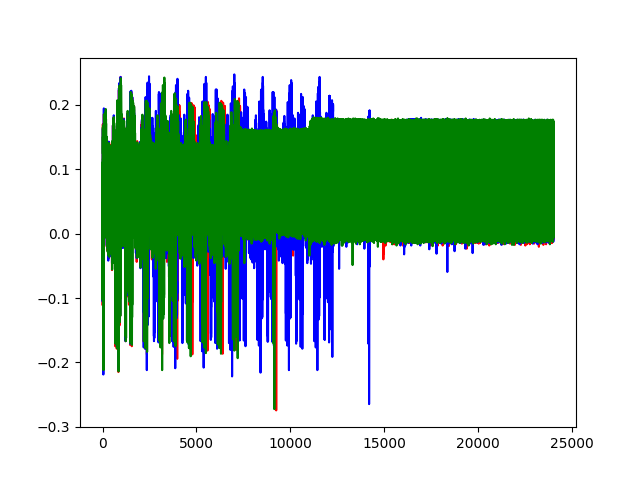

In [10]:
scope.adc.offset = 0
plt.figure()
text = bytearray([0x80, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'r')
text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'b')
text = bytearray([0x50, 0xb4, 0xc1, 0x41, 0x36, 0xbd, 0x19, 0x8c, 0x2f, 0x3c, 0x3e, 0xd2, 0x43, 0xfc, 0xe0, 0x36])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'g')

<IPython.core.display.Javascript object>


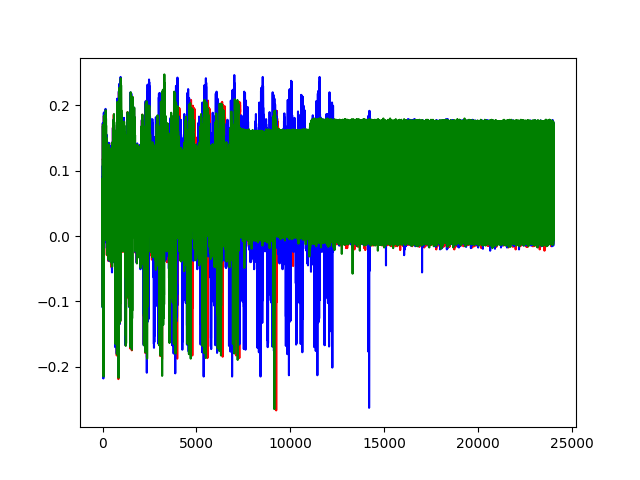

In [11]:
scope.adc.offset = 0
plt.figure()
text = bytearray([0x80, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'r')
text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'b')
text = bytearray([0x50, 0xb4, 0xc1, 0x41, 0x36, 0xbd, 0x19, 0x8c, 0x2f, 0x3c, 0x3e, 0xd2, 0x43, 0xfc, 0xe0, 0x36])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'g')

<IPython.core.display.Javascript object>


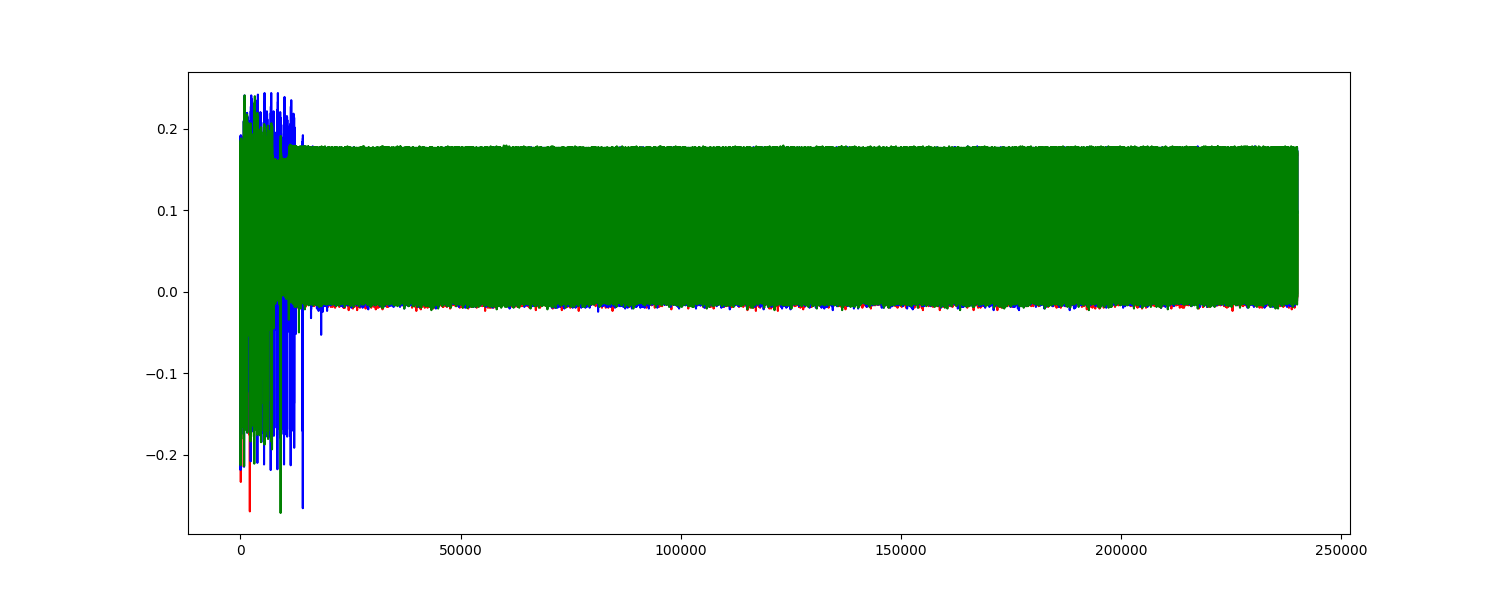

In [12]:
n=10

trace1=[]
trace2=[]
trace3=[]

for i in range(n):
    scope.adc.offset = 24400 * i
    text = bytearray([0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
    trace = pd.DataFrame(capture_RSA_trace(scope, target, text))
#     trace1 = trace1.append(trace, ignore_index=True)
    trace1 = np.concatenate((trace1, trace), axis=None)
    
    text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
    trace = pd.DataFrame(capture_RSA_trace(scope, target, text))
#     trace1 = trace1.append(trace, ignore_index=True)
    trace2 = np.concatenate((trace2, trace), axis=None)

    text = bytearray([0x50, 0xb4, 0xc1, 0x41, 0x36, 0xbd, 0x19, 0x8c, 0x2f, 0x3c, 0x3e, 0xd2, 0x43, 0xfc, 0xe0, 0x36])
    trace = pd.DataFrame(capture_RSA_trace(scope, target, text))

    trace3 = np.concatenate((trace3, trace), axis=None)



plt.figure(figsize=(15, 6))
plt.plot(trace1, 'r')
time.sleep(1)
plt.plot(trace2, 'b')
time.sleep(1)
plt.plot(trace3, 'g')
plt.show()

<IPython.core.display.Javascript object>


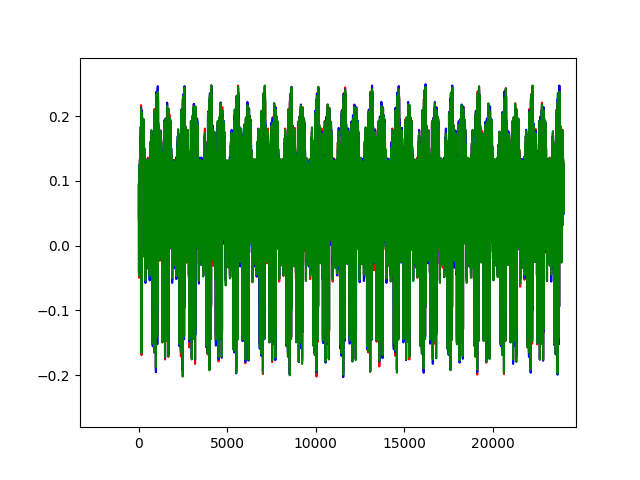

In [33]:
scope.adc.offset = 0
plt.figure(0)
text = bytearray([0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
trace = capture_RSA_trace_beta(scope, target, text)
plt.plot(trace, 'r')
text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = capture_RSA_trace_beta(scope, target, text)
plt.plot(trace, 'b')
text = bytearray([0x50, 0xb4, 0xc1, 0x41, 0x36, 0xbd, 0x19, 0x8c, 0x2f, 0x3c, 0x3e, 0xd2, 0x43, 0xfc, 0xe0, 0x36])
trace = capture_RSA_trace_beta(scope, target, text)
plt.plot(trace, 'g')

<IPython.core.display.Javascript object>


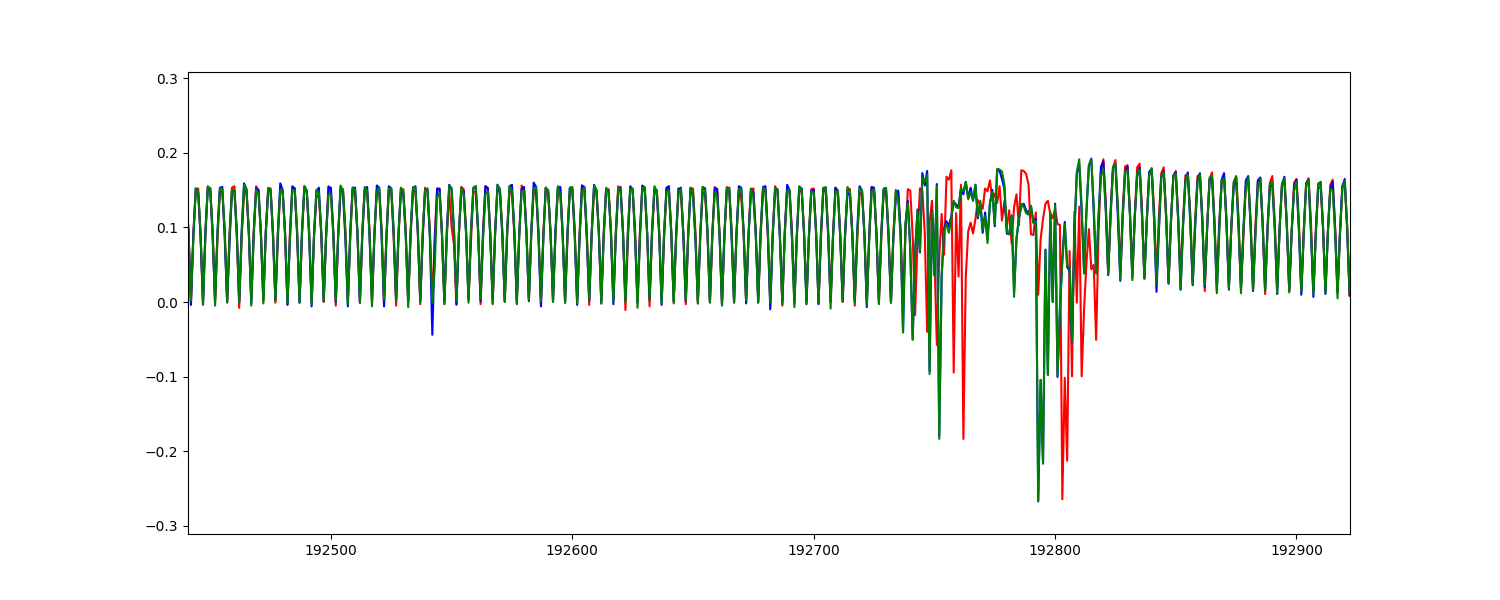

In [66]:
n=10
trace1=[]
trace2=[]
trace3=[]

for i in range(n):
    scope.adc.offset = 24400 * i
    text = bytearray([0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
    trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))
#     trace1 = trace1.append(trace, ignore_index=True)
    trace1 = np.concatenate((trace1, trace), axis=None)

    text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
    trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

    trace2 = np.concatenate((trace2, trace), axis=None)
    
    text = bytearray([0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa])
    trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

    trace3 = np.concatenate((trace3, trace), axis=None)


plt.figure(figsize=(15, 6))
plt.plot(trace1, 'r')
plt.plot(trace2, 'b')
plt.plot(trace3, 'g')
plt.show()

<IPython.core.display.Javascript object>


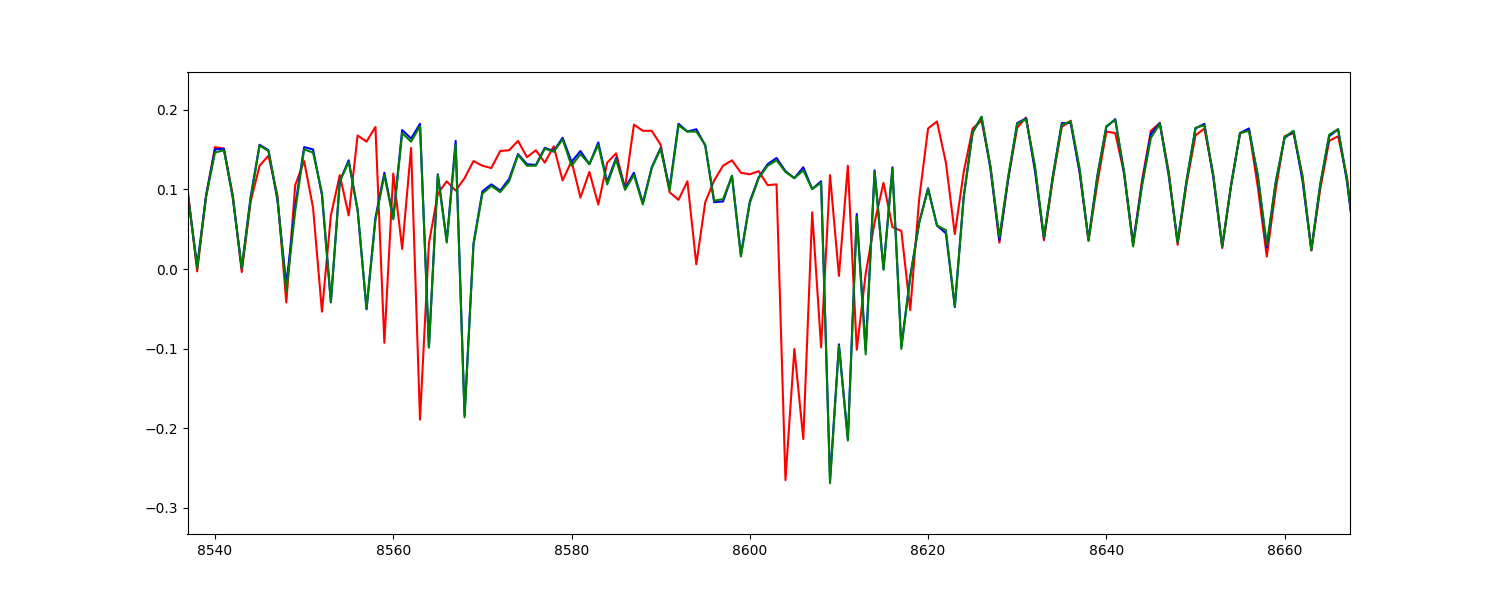

In [54]:
plt.figure(figsize=(15, 6))

scope.adc.offset = 24400 * 4

text = bytearray([0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

plt.plot(trace, 'r')

text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

plt.plot(trace, 'b')

text = bytearray([0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa, 0xaa])
trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

plt.plot(trace, 'g')





plt.show()


<IPython.core.display.Javascript object>


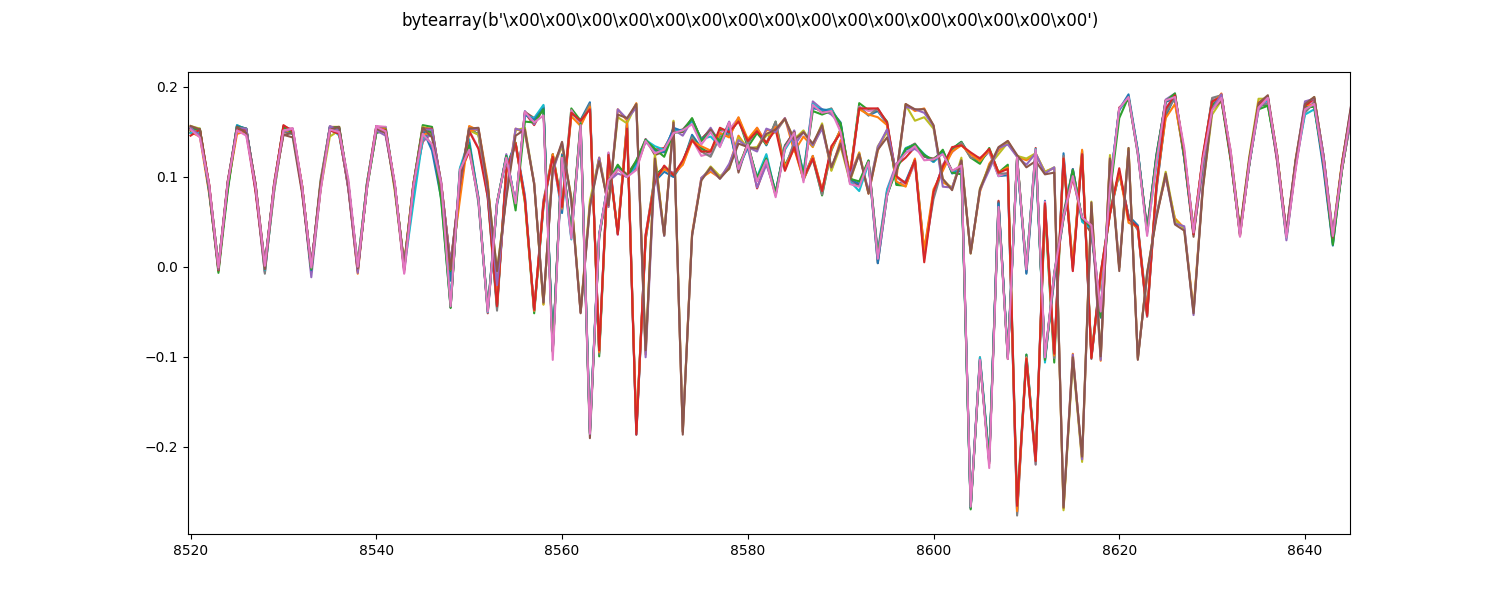

In [63]:
fig = plt.figure(figsize=(15, 6))

scope.adc.offset = 24400 * 4

text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

plt.suptitle(text)
plt.plot(trace[8520:8660])
fig.canvas.draw()
time.sleep(0.5)


for i in range(16):
    text[i] = 0x00
    trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

    plt.suptitle(text)
    plt.plot(trace[8520:8660])
    fig.canvas.draw()
    time.sleep(0.5)

<IPython.core.display.Javascript object>


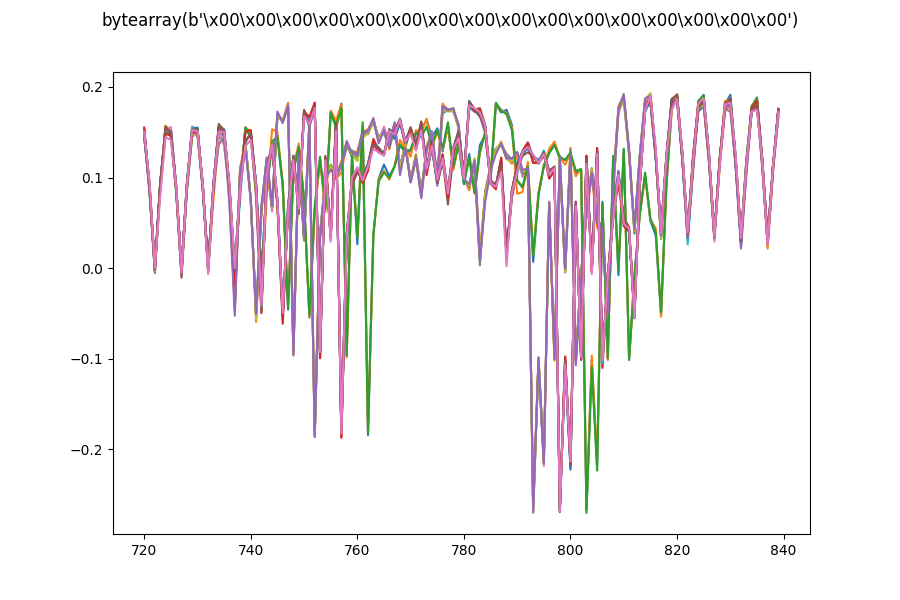

In [71]:
fig = plt.figure(figsize=(9, 6))

scope.adc.offset = 24400 * 8

text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

plt.suptitle(text)
plt.plot(trace[720:840])
fig.canvas.draw()
time.sleep(0.5)


for i in range(16):
    text[i] = 0x00
    trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

    plt.suptitle(text)
    plt.plot(trace[720:840])
    fig.canvas.draw()
    time.sleep(0.5)

# Text Generation

In [15]:
ktp = cw.ktp.Basic()
key, text = ktp.next()

In [16]:
n=10


trace_array=[]
text_array=[]

for j in tnrange(100, desc="text"):
    trace1=[]
    key, text = ktp.next()
    text_array.append(text)
    for i in tnrange(n, desc="offset", leave=False):
        scope.adc.offset = 24400 * i
        trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))
        trace1 = np.concatenate((trace1, trace), axis=None)
        
    trace_array.append(trace1)

text:   0%|          | 0/100 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

offset:   0%|          | 0/10 [00:00<?, ?it/s]

In [17]:
len(trace_array)

100

In [19]:
for i in range(len(text_array)):
    print(text_array[i])

CWbytearray(b'41 a7 be 63 b8 92 26 ae b5 48 3c 91 cd 11 73 36')
CWbytearray(b'9e e5 45 2a e7 3f 67 9f 01 6f 5e 31 de 73 ff eb')
CWbytearray(b'62 03 6d 8e c1 7b c3 d2 53 ea f7 87 40 f6 9f 1a')
CWbytearray(b'3c 86 c1 96 63 af 9c 86 f7 7c 06 37 51 3d fa ae')
CWbytearray(b'63 1a 69 c8 32 aa ec 2d 81 d1 1c 2d 8d df 2a 99')
CWbytearray(b'1d e8 14 cc 99 3f 37 b8 b1 e5 fd bd 34 e1 41 76')
CWbytearray(b'a7 02 a2 2c 96 df 05 32 47 a4 11 7e d0 b0 da 1d')
CWbytearray(b'3d 6f 84 65 7e 82 13 50 61 2c 75 6e 79 71 b8 bd')
CWbytearray(b'58 fd b9 86 51 89 40 61 51 18 20 1e 7e 76 57 ef')
CWbytearray(b'2a 05 48 0b da 55 09 5c ad e2 0b 28 dd eb 82 0c')
CWbytearray(b'ac 68 13 6f 6a 8b 47 4f ae ff 74 43 06 a9 81 f2')
CWbytearray(b'bb 43 7f e3 5f 74 53 cd a0 11 91 e0 3c d4 cf df')
CWbytearray(b'03 9e 24 af 08 f1 f6 14 96 5f ae de 18 1e 1e 79')
CWbytearray(b'cc 18 71 06 21 d5 79 81 2b 7a e9 a1 21 47 8e 2c')
CWbytearray(b'1a fd e8 3f 04 43 01 c7 14 d3 8c bb c6 ab 92 53')
CWbytearray(b'6e 28 e7 d7 56 8c ea a0 01

<IPython.core.display.Javascript object>


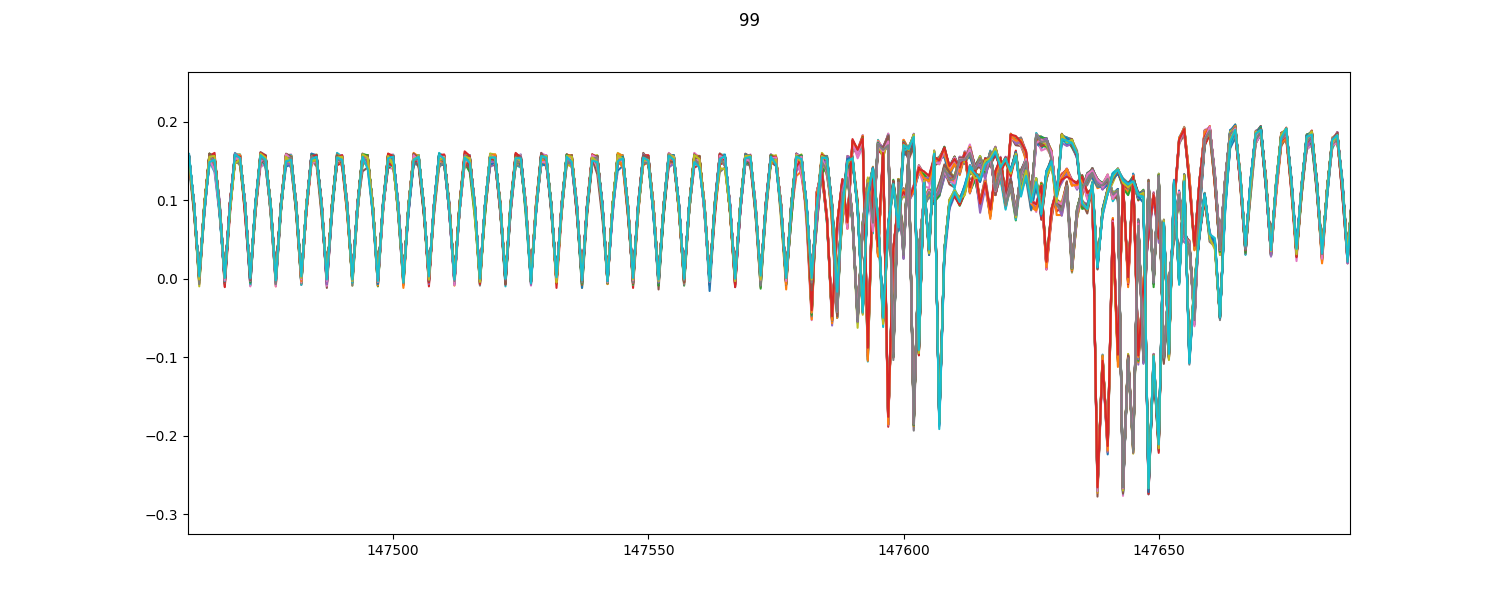

In [23]:
fig = plt.figure(figsize=(15,6))
for i in range(100):
#     time.sleep(0.1)
    plt.suptitle(i)
    plt.plot(trace_array[i])
    fig.canvas.draw()

In [24]:
scope.dis()
target.dis()